In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

In [2]:
!gdown --id 1E4R21ht_ZM7Rpr2rKtZasvi7Lwy2zDfN

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1E4R21ht_ZM7Rpr2rKtZasvi7Lwy2zDfN
To: /content/verim.csv
100% 6.60k/6.60k [00:00<00:00, 8.27MB/s]


In [3]:
dataset = pd.read_csv("verim.csv")

In [4]:
one_hot = OneHotEncoder(handle_unknown='ignore')
one_hot_cinsiyet = one_hot.fit_transform(dataset['Cinsiyet'].values.reshape(-1,1)).toarray()
one_hot_df = pd.DataFrame(one_hot_cinsiyet, columns = one_hot.categories_)
one_hot_df.head()

,0,1
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [5]:
one_hot_dfjoin = dataset.join(one_hot_df)
one_hot_dfjoin.head()
one_hot_dfjoin.drop ("Cinsiyet", axis=1, inplace= True)
one_hot_dfjoin.head()

,Numara,Yas,Gelir,AlimDurumu,"(0,)","(1,)"
0,15669656,31,18000,0,1.0,0.0
1,15581198,31,74000,0,1.0,0.0
2,15729054,27,137000,1,0.0,1.0
3,15573452,21,16000,0,0.0,1.0
4,15776733,28,44000,0,0.0,1.0


In [6]:
X= one_hot_dfjoin.drop("AlimDurumu", axis=1)
y= one_hot_dfjoin["AlimDurumu"]
print(y)

0      0
1      0
2      1
3      0
4      0
      ..
278    0
279    1
280    1
281    0
282    1
Name: AlimDurumu, Length: 283, dtype: int64


In [7]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)
print(y)

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state= 1)
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size = 0.1, random_state=1)


In [9]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()

In [10]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_validation = sc.transform(x_validation)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam,SGD

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
model = Sequential()
model.add(Dense(150, input_dim=5, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(2, activation='softmax' ))

In [14]:
opt = Adam(learning_rate=0.0001,
    beta_1=0.9,
    beta_2=0.979)
model.compile(loss='binary_crossentropy', optimizer=opt)


In [15]:
monitor = EarlyStopping(monitor='val_loss' , min_delta=1e-3, patience=25,
                        verbose=1, mode='auto', restore_best_weights= True)

In [16]:
history = model.fit(x_train,y_train,validation_data=(x_validation, y_validation),callbacks=[monitor],verbose=0 , epochs=4000)

Restoring model weights from the end of the best epoch: 150.
Epoch 175: early stopping


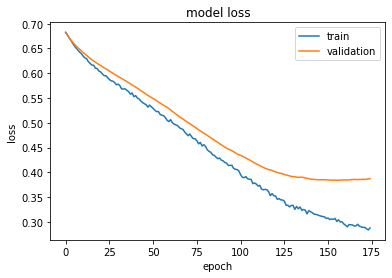

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper right')
plt.show()

In [18]:
tahminler = model.predict(x_test)
print(tahminler)

[[9.9942124e-01 5.7874282e-04]
 [2.1473041e-02 9.7852695e-01]
 [6.5308326e-01 3.4691671e-01]
 [9.9937481e-01 6.2526751e-04]
 [9.8479813e-01 1.5201864e-02]
 [2.9822791e-01 7.0177215e-01]
 [9.2278564e-01 7.7214330e-02]
 [9.6721375e-01 3.2786302e-02]
 [9.9944550e-01 5.5451749e-04]
 [1.9743551e-02 9.8025644e-01]
 [9.9783093e-01 2.1690913e-03]
 [9.9107003e-01 8.9299455e-03]
 [9.5197505e-01 4.8024897e-02]
 [9.9721658e-01 2.7834426e-03]
 [9.8801607e-01 1.1983978e-02]
 [9.9745125e-01 2.5487915e-03]
 [9.6244532e-01 3.7554733e-02]
 [9.8436153e-01 1.5638467e-02]
 [9.9746823e-01 2.5317832e-03]
 [3.0103937e-01 6.9896060e-01]
 [9.9316651e-01 6.8334593e-03]
 [9.9902320e-01 9.7676856e-04]
 [5.2776817e-02 9.4722313e-01]
 [9.9175537e-01 8.2445927e-03]
 [9.2091125e-01 7.9088755e-02]
 [9.5704722e-01 4.2952776e-02]
 [6.1901617e-01 3.8098386e-01]
 [9.4604391e-01 5.3956158e-02]
 [8.0167454e-01 1.9832543e-01]
 [2.2457251e-01 7.7542752e-01]
 [9.5882046e-01 4.1179549e-02]
 [3.8624150e-01 6.1375856e-01]
 [9.9028

In [19]:
pred = np.argmax(tahminler,axis=1)
test = np.argmax(y_test,axis=1)
print(pred)
print(test)

[0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0]
[0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0
 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


In [20]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print("karmaşıklık matrisi:")
print(confusion_matrix(y_true=test, y_pred = pred))
print("sınıflandırma raporu:")
print(classification_report (y_true=test, y_pred = pred))
print("doğruluk değeri:", accuracy_score (y_true=test, y_pred = pred))


karmaşıklık matrisi:
[[43  3]
 [ 2  9]]
sınıflandırma raporu:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        46
           1       0.75      0.82      0.78        11

    accuracy                           0.91        57
   macro avg       0.85      0.88      0.86        57
weighted avg       0.92      0.91      0.91        57

doğruluk değeri: 0.9122807017543859
